In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement=Base.classes.measurement
station=Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)
inspector = inspect(engine)
columns=inspector.get_columns('measurement')
for column in columns:
    print(column["name"],column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
rdate=session.query(measurement.date,measurement.prcp).order_by(measurement.date.desc()).first()
ydate=rdate.date
ydate

'2017-08-23'

In [10]:
from datetime import datetime, timedelta 
from dateutil.relativedelta import *
import matplotlib.pyplot as plt
dt = datetime.strptime(ydate, "%Y-%m-%d")
oprior = dt - timedelta(days=365)
oyear = oprior.strftime("%Y-%m-%d")
oyear

'2016-08-23'

In [11]:
sdate=session.query(measurement.date,measurement.prcp,measurement.station,measurement.tobs).\
filter(measurement.date >= oyear).all()
prows = [{"date": s[0], "prcp": s[1]} for s in sdate]
prows

[{'date': '2016-08-23', 'prcp': 0.0},
 {'date': '2016-08-24', 'prcp': 0.08},
 {'date': '2016-08-25', 'prcp': 0.08},
 {'date': '2016-08-26', 'prcp': 0.0},
 {'date': '2016-08-27', 'prcp': 0.0},
 {'date': '2016-08-28', 'prcp': 0.01},
 {'date': '2016-08-29', 'prcp': 0.0},
 {'date': '2016-08-30', 'prcp': 0.0},
 {'date': '2016-08-31', 'prcp': 0.13},
 {'date': '2016-09-01', 'prcp': 0.0},
 {'date': '2016-09-02', 'prcp': 0.0},
 {'date': '2016-09-03', 'prcp': 0.0},
 {'date': '2016-09-04', 'prcp': 0.03},
 {'date': '2016-09-05', 'prcp': None},
 {'date': '2016-09-06', 'prcp': None},
 {'date': '2016-09-07', 'prcp': 0.05},
 {'date': '2016-09-08', 'prcp': 0.0},
 {'date': '2016-09-09', 'prcp': 0.03},
 {'date': '2016-09-10', 'prcp': 0.0},
 {'date': '2016-09-11', 'prcp': 0.05},
 {'date': '2016-09-12', 'prcp': 0.0},
 {'date': '2016-09-13', 'prcp': 0.02},
 {'date': '2016-09-14', 'prcp': 1.32},
 {'date': '2016-09-15', 'prcp': 0.42},
 {'date': '2016-09-16', 'prcp': 0.06},
 {'date': '2016-09-17', 'prcp': 0.05

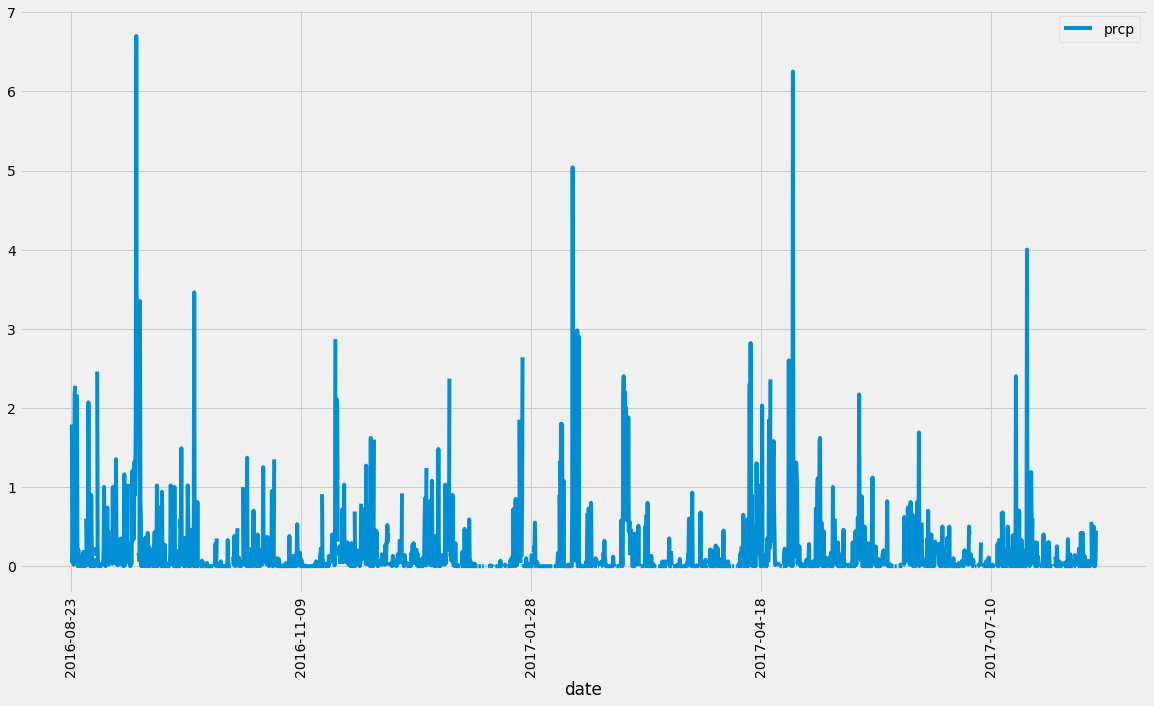

In [12]:
ddate=pd.DataFrame(prows).set_index("date").sort_values(by=['date'],ascending=True)
ddate.plot(figsize=(18,10),rot=90)

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame and set the index to the date column


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data




In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
ddate.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number stations in the dataset
#sstate=session.query(measurement.date,measurement.station,measurement.prcp,measurement.tobs).\
#distinct(measurement.station).limit(16)
scount=session.query(measurement.station).distinct().count()
scount

9

In [16]:
tray=session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).all()
trayz=session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).\
order_by(func.count(measurement.station).desc()).first()
trayz.station

'USC00519281'

In [17]:
scnt=session.query(measurement.station,measurement.tobs,measurement.date).\
group_by(measurement.date).\
filter_by(station=trayz.station).\
filter(measurement.date >= oyear).all()
#stemp=session.query(measurement.station,measurement.tobs,measurement.date).filter_by(station='USC00519281')
#stemps.describe()
#stemps.count()
scnt

[('USC00519281', 77.0, '2016-08-23'),
 ('USC00519281', 77.0, '2016-08-24'),
 ('USC00519281', 80.0, '2016-08-25'),
 ('USC00519281', 80.0, '2016-08-26'),
 ('USC00519281', 75.0, '2016-08-27'),
 ('USC00519281', 73.0, '2016-08-28'),
 ('USC00519281', 78.0, '2016-08-29'),
 ('USC00519281', 77.0, '2016-08-30'),
 ('USC00519281', 78.0, '2016-08-31'),
 ('USC00519281', 80.0, '2016-09-01'),
 ('USC00519281', 80.0, '2016-09-02'),
 ('USC00519281', 78.0, '2016-09-03'),
 ('USC00519281', 78.0, '2016-09-04'),
 ('USC00519281', 78.0, '2016-09-05'),
 ('USC00519281', 73.0, '2016-09-06'),
 ('USC00519281', 74.0, '2016-09-07'),
 ('USC00519281', 80.0, '2016-09-08'),
 ('USC00519281', 79.0, '2016-09-09'),
 ('USC00519281', 77.0, '2016-09-10'),
 ('USC00519281', 80.0, '2016-09-11'),
 ('USC00519281', 76.0, '2016-09-12'),
 ('USC00519281', 79.0, '2016-09-13'),
 ('USC00519281', 75.0, '2016-09-14'),
 ('USC00519281', 79.0, '2016-09-15'),
 ('USC00519281', 78.0, '2016-09-16'),
 ('USC00519281', 79.0, '2016-09-17'),
 ('USC005192

In [18]:
strim = [{"Date": s[2], "Temp": s[1]} for s in scnt]
#ddate=pd.DataFrame(prows).set_index("date").sort_values(by=['date'],ascending=True)
stemps=pd.DataFrame(strim)
#stemps

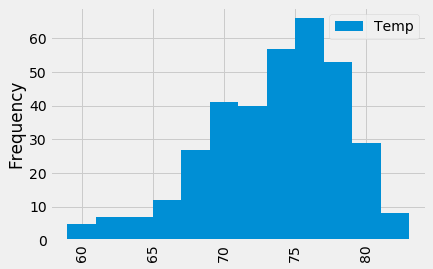

In [19]:
stemps.plot(kind='hist',bins=12,rot=90)

In [20]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

In [26]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
start=session.query(func.min(measurement.tobs),func.avg(measurement.tobs),func.max(measurement.tobs)).filter(measurement.date >= oyear).all()
start

[(58.0, 74.59058295964125, 87.0)]

In [22]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [23]:
# Close Session
session.close()